# Importing Libraries

In [513]:
# pip install opencv-python

In [514]:
#Importing all the relevant libraries needed.
import pandas as pd
import sklearn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN

# Importing datasets

In [515]:
# Reading the csv file "x_train_all.csv"
df = pd.read_csv("x_train_all.csv")

In [516]:
# # Intialising all Y train set in OneVsAll.
# Y_train0 = pd.read_csv("./OnevrsAll/OnevrsAll/0_vrs_all/y_train_0.csv")
# Y_train1 = pd.read_csv("./OnevrsAll/OnevrsAll/1_vrs_all/y_train_1.csv")
# Y_train2 = pd.read_csv("./OnevrsAll/OnevrsAll/2_vrs_all/y_train_2.csv")
# Y_train3 = pd.read_csv("./OnevrsAll/OnevrsAll/3_vrs_all/y_train_3.csv")
# Y_train4 = pd.read_csv("./OnevrsAll/OnevrsAll/4_vrs_all/y_train_4.csv")
# Y_train5 = pd.read_csv("./OnevrsAll/OnevrsAll/5_vrs_all/y_train_5.csv")
# Y_train6 = pd.read_csv("./OnevrsAll/OnevrsAll/6_vrs_all/y_train_6.csv")
# Y_train7 = pd.read_csv("./OnevrsAll/OnevrsAll/7_vrs_all/y_train_7.csv")
# Y_train8 = pd.read_csv("./OnevrsAll/OnevrsAll/8_vrs_all/y_train_8.csv")
# Y_train9 = pd.read_csv("./OnevrsAll/OnevrsAll/9_vrs_all/y_train_9.csv")

In [517]:
# # Reading Y trainset of different classes in OneVSAll.
# y_train_array = [Y_train0,Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9]

In [518]:
# Reading the csv file "y_train_all.csv"
train_y_df = pd.read_csv("y_train_all.csv")

In [519]:
train_y_df['0'].value_counts()

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: count, dtype: int64

# Data Visulaization and Exploration

In [520]:
# Retrieving the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [521]:
# Retrieving the information on the shape of the data.
df.shape

(9690, 2304)

In [522]:
# Printing the first five rows of the data.
df.head()

0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]

### Pixel Intensity Histogram

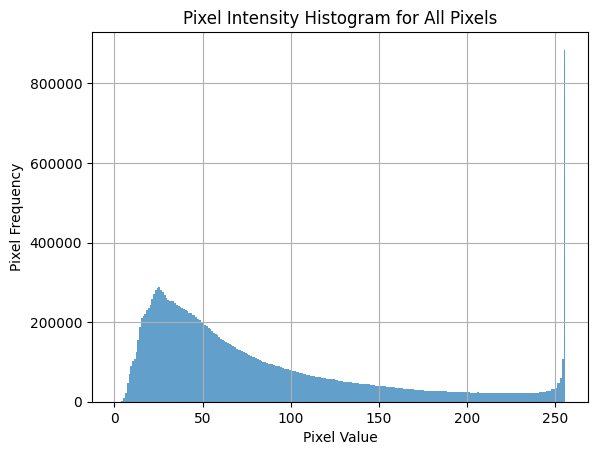

In [523]:
# Flattens the dataframe df into a 1 dimensional array to plot the histogram.
reshaped_df = df.values.ravel()
# Creates the histogram to view the pixel intensity.
plt.hist(reshaped_df, bins=256, range=(0, 256), alpha=0.7)
# Labels the x - axis as Pixel Value.
plt.xlabel('Pixel Value')
# Labels the y - axis as Pixel Frequency.
plt.ylabel('Pixel Frequency')
# Labels the title as Pixel Intensity Histogram for All Pixels.
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the grid lines on the histogram.
plt.grid(True)
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the histogram.
plt.show()

### Visualizing the image

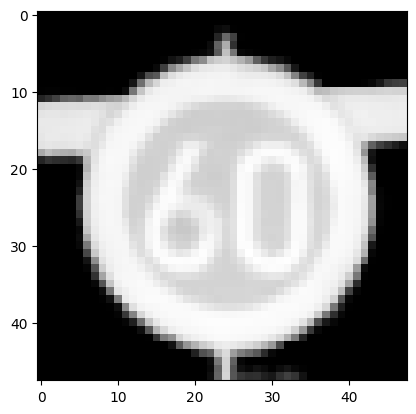

In [524]:
# Storing the images in visualize_img.
visualize_img = df.values

# Viewing the image.
some_digit = visualize_img[5002]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

# Image Enhancement Technique

### Histogram Equalization

In [530]:
# Reshapes the dataframe df into 3D array in the shape 48x48 grid to represent
# in form of image.
reshaped_df = df.values.reshape(-1, 48, 48)

# Initializing the list to store images after applying equalization.
equalized_df = []

# Iterating through all the images to apply histogram equalisation.
for image in reshaped_df:
    # Checking if the image is in the greyscale format and is 8-bit.
    if image.dtype != np.uint8:
        # Converting the image to 8 - bit otherwise.
        image = cv2.convertScaleAbs(image)  # Convert to 8-bit image if needed.

    # Applying histogram equalisation to the image to enchance the contrast.
    equalized_img = cv2.equalizeHist(image)

    # Adding the enchanced image to the equalized_df.
    equalized_df.append(equalized_img)

# Converting the list into NumPy array.
equalized_df = np.array(equalized_df)


In [525]:
# Storing the no. of images and dimensions of equalized_df.
n_img, height, width = equalized_df.shape

# Reshaping the array into two - dimensional array.
equalized_ndf = equalized_df.reshape(n_img, -1)

# Converting the array equalized_ndf into a dataframe.
ndf = pd.DataFrame(equalized_ndf)

### Gamma Correction

In [529]:
# Setting the gamma value for gamma correction.
gamma = 0.62
# Applying gamma correction on the dataframe ndf.
gamma_corrected_ndf = ndf.apply(lambda x: 255 * (x / 255) ** (1 / gamma))

# Data Preprocessing

### Normalizing the dataset

In [526]:
# Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
max_pixel= 255
# Normalizing the dataframe gamma_corrected_ndf.
normalized_df = gamma_corrected_ndf.divide(max_pixel)

In [527]:
# # Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
# max_pixel= 255
# # Normalizing the dataframe gamma_corrected_ndf.
# normalized_df = ndf.divide(max_pixel)

In [528]:
# normalized_df = ndf.copy()

In [531]:
# Printing the first five rows of the normalized_df.
normalized_df.head()

0         1         2         3         4         5         6     \
0  0.015170  0.012679  0.009270  0.038780  0.081784  0.135948  0.257663   
1  0.005387  0.009270  0.025159  0.020645  0.012679  0.009270  0.107567   
2  0.007229  0.015170  0.036957  0.026738  0.050402  0.130071  0.257663   
3  0.003759  0.009270  0.020645  0.063147  0.176498  0.288555  0.320758   
4  0.022112  0.022112  0.016479  0.012679  0.044447  0.113040  0.224523   

       7         8         9     ...      2294      2295      2296      2297  \
0  0.402310  0.384562  0.415820  ...  0.081784  0.020645  0.001761  0.009270   
1  0.269092  0.515050  0.443346  ...  0.170000  0.147996  0.069921  0.015170   
2  0.288555  0.099552  0.138924  ...  0.203404  0.176498  0.121442  0.040636   
3  0.199962  0.007229  0.228119  ...  0.337341  0.166786  0.121442  0.079355   
4  0.269092  0.094340  0.089236  ...  0.196542  0.179782  0.186418  0.196542   

       2298      2299      2300      2301      2302      2303  
0  0.046400  0.170000  0.199962  0.189770  0.170000  0.154164  
1  0.000402  0.005387  0.052450  0.206869  0.217395  0.217395  
2  0.010361  0.004546  0.012679  0.040636  0.130071  0.176498  
3  0.038780  0.013903  0.009270  0.013903  0.072237  0.130071  
4  0.186418  0.124293  0.054529  0.001229  0.003031  0.012679  

[5 rows x 2304 columns]

In [534]:
# Retrieving the information on the shape of the data.
normalized_df.shape

(9690, 2304)

In [532]:
# Converting the normalized data to an array
data_array = normalized_df.values

### Checking for Null Values

In [533]:
# Checking for any null values in the dataframe.
null_values = normalized_df.isnull().sum().sum()
# Printing the number of null values.
print("Total Number of Null Values:", null_values)

Total Number of Null Values: 0


### Images after applying image enhancement techniques 

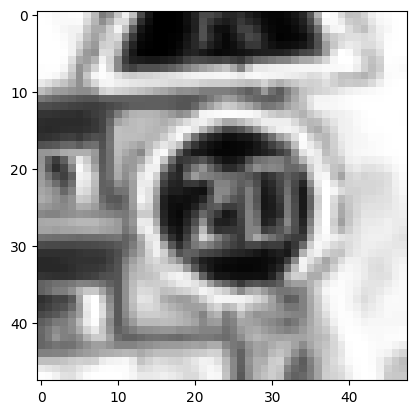

In [535]:
# Storing the images in visualize_img.
visualize_img = normalized_df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

# Outlier Mining

### DBSCAN

In [536]:
# Setting the value for epsilon parameter for DBSCAN.
eps = 11.0
# Setting the value for minimum sample parameter for DBSCAN.
min_samples = 80
# Intialsing the model for DBSCAN.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# Fitting the model to the data_array.
dbscan.fit(data_array)
# Labels all the outliers.
outlier_labels = dbscan.labels_

In [537]:
# Printing the total number of outliers.
num_outliers = np.sum(outlier_labels == -1)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 3680


In [538]:
# Finding all the places where the outliers lie.
outlier_indices = np.where(outlier_labels == -1)[0]
# Coverting it into a list
outlier_indices = outlier_indices.tolist()
# Printing the list of outliers.
# print("Outlier List : ",outlier_indices)

### Scatter Plot for Outlier Visualization

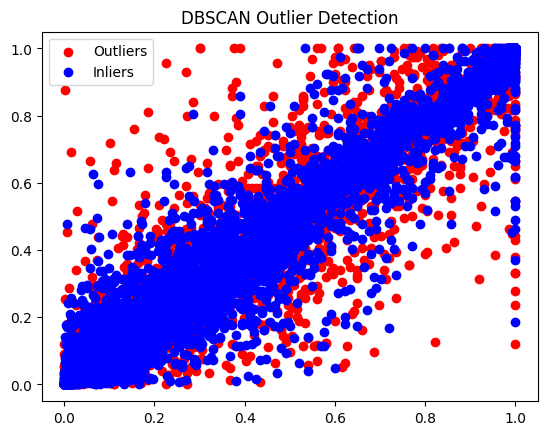

In [539]:
# Creating  a scatter plot to visualize the outliers in the dataset.
plt.scatter(data_array[outlier_labels == -1, 0], data_array[outlier_labels == -1, 1], c='red', label='Outliers')
# Here the red represents the outliers and blue represents inliers.
plt.scatter(data_array[outlier_labels != -1, 0], data_array[outlier_labels != -1, 1], c='blue', label='Inliers')
plt.legend()
# Lablelling the Plot.
plt.title('DBSCAN Outlier Detection')
plt.show()

In [540]:
# Removing all the outliers in the dataframe.
def removeOutliers(dataframe):
    dataframe.drop(dataframe.index[outlier_indices], axis=0, inplace=True)

In [541]:
# Calling the function to  remove the outliers.
removeOutliers(normalized_df)

In [542]:
# # Removing the outliers in the y_train dataset.
# for i in range(len(y_train_array)):
#     removeOutliers(y_train_array[i])

In [543]:
# # Checking the dimension of one of the y_train files after removing the outliers.
# Y_train2.shape

In [544]:
# Removing the outliers in train_y_df.
removeOutliers(train_y_df)

In [545]:
# Checking the dimension of  train_y_df files after removing the outliers.
train_y_df.shape

(6010, 1)

# Dimensionality Reduction (using PCA)

In [546]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [547]:
X = pd.read_excel("Top5.xlsx")

### Explained Variance Ratio

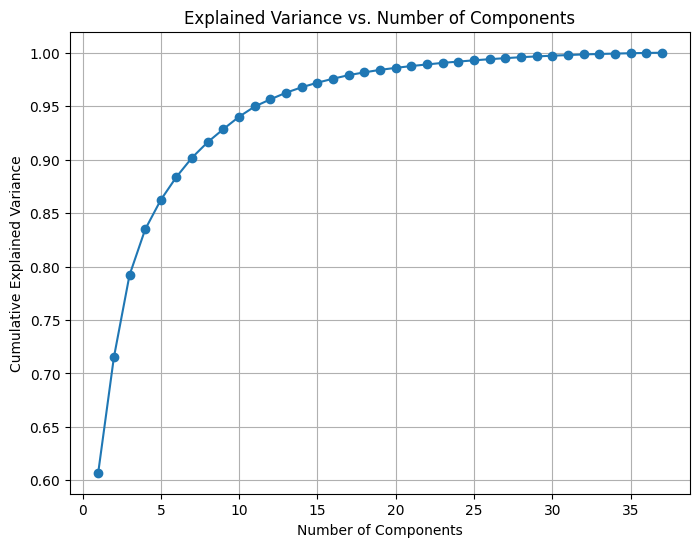

In [548]:
# Initialize PCA with all components
pca = PCA()

# Fit PCA to the data
pca.fit(X)

count = 0

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
        
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [549]:
explained_variance_ratio

array([6.07106306e-01, 1.07789860e-01, 7.70823738e-02, 4.27575778e-02,
       2.76315330e-02, 2.15408175e-02, 1.80677731e-02, 1.44554453e-02,
       1.21913352e-02, 1.15286989e-02, 9.55996388e-03, 6.71286068e-03,
       6.18403151e-03, 5.08308844e-03, 4.28113193e-03, 3.70993432e-03,
       3.36405558e-03, 2.57173175e-03, 2.35286732e-03, 1.85446648e-03,
       1.70889293e-03, 1.48935151e-03, 1.46991248e-03, 1.23680508e-03,
       1.14717222e-03, 1.07254123e-03, 9.67778637e-04, 8.97341631e-04,
       7.22955967e-04, 6.71586509e-04, 6.06695271e-04, 5.90181377e-04,
       4.08156719e-04, 3.81810589e-04, 3.31500494e-04, 2.62904730e-04,
       2.08559320e-04])

In [550]:
# count = 0
# for i in explained_variance_ratio:
#     if(count == 20):
#         break
#     else:
#         print(i)
#         count+=1

#printing highest explained variance ratio
print(max(explained_variance_ratio))        

0.6071063063989016


In [551]:
#calculating number of dimentions to reduce to for PCA
count = 0
for i in explained_variance_ratio:
    if(i>=0.01):
        count+=1
print(count)

10


In [552]:
#Transforming complete train dataset
# Initialize PCA with 5 components
pca = PCA(n_components=5)

# Fit PCA to the data and transform the data
X1_pca = pca.fit_transform(normalized_df)

In [553]:
#Transforming dataset with top 5 features
# Initialize PCA with 5 components
pca = PCA(n_components=5)

# Fit PCA to the data and transform the data
X_pca = pca.fit_transform(X)

In [554]:
pca_df = pd.DataFrame(X_pca)

# Feature Selection

### Creating datasets with top 5, 10 and 20 features using SelectKBest

In [555]:
# # The function returns the top n features for the given dataset.
# # Here the n is the number of feature and y is the training dataset.
# def top_features(n,y):
#     # Intialising the SelectKBest to find the top n features.
#     select = SelectKBest(score_func=chi2, k=n)
#     # Fitting the SelectKBest to normalized_df
#     z = select.fit_transform(normalized_df,y)
#     # Here we are filtering all features that are selected as the top features
#     filter = select.get_support()
#     # Getting the name of the features.
#     col_name = normalized_df.columns.values.tolist()
#     # Selecting the top features.
#     fea = array(col_name)[filter]
#     # Returning the top features
#     return fea


In [556]:
# # This function return all the top n unique features for each class.
# def select_features(n):
#     # Stores all the features.
#     temp_lst = []
#     # Iterates through training data set gets the top n features
#     for i in range(len(y_train_array)):
#         feature_5=top_features(n,y_train_array[i])
#         #Iterates through the list and see if the feature is unique.
#         for i in feature_5:
#             if i not in temp_lst:
#                 # Adds the feature to the list.
#                 temp_lst.append(i)
#     # Returns the unique features.
#     return temp_lst


In [557]:
# # Gets the top 5 features for all classes and adds it into a excel.
# df_top5 = normalized_df.filter(select_features(5), axis=1)
# df_top5.to_excel('Top5.xlsx', index=False)
# # Gets the top 10 features for all classes and adds it into a excel.
# df_top10 = normalized_df.filter(select_features(10), axis=1)
# df_top10.to_excel('Top10.xlsx', index=False)
# # Gets the top 20 features for all classes and adds it into a excel.
# df_top20 = normalized_df.filter(select_features(20), axis=1)
# df_top20.to_excel('Top20.xlsx', index=False)

In [558]:
# # Printing the first five rows of the df_top5 to check.
# df_top5.head()

In [559]:
# # Checking the dimension of df_top5.
# df_top5.shape

<!-- # Data Visualisation -->

In [560]:
# # Loading CSV files
# dy = pd.read_csv('y_train_all.csv')  
# dx = pd.read_csv('x_train_all.csv') 

# class_ranges = {}
# current_class = dy.iloc[0, 0]  # Get first class label
# start_row = 0

# # Iterate through the y_train_all dataset to find row ranges for each class
# for i in range(1, len(dy)):
#     if dy.iloc[i, 0] != current_class:
#         end_row = i - 1
#         class_ranges[current_class] = (start_row, end_row)
#         current_class = dy.iloc[i, 0]
#         start_row = i

# # Adding the last class range
# end_row = len(dy) - 1
# class_ranges[current_class] = (start_row, end_row)

# # Printing the row ranges for each class in y_train_all dataset
# print("Row ranges for each class label in y_train:")
# for class_label, (start, end) in class_ranges.items():
#     print(f"Class {class_label}: Rows {start} to {end}")

# # applying same row ranges to x_train_all
# class_ranges_x_train = {}

# for class_label, (start, end) in class_ranges.items():
#     x_train_subset = dx.iloc[start:end+1]
#     class_ranges_x_train[class_label] = x_train_subset

# # Printing the row ranges for each class label in x_train
# print("\nRow ranges for each class label in x_train:")
# for class_label, x_train_subset in class_ranges_x_train.items():
#     print(f"Class {class_label}: Rows {x_train_subset.index[0]} to {x_train_subset.index[-1]}")

# K - Means Clustering

In [561]:
#Importing library
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding

from plotly.offline import init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

In [562]:
# #Reading file with top 5, 10 and 20 features for each class
# df_5 = pd.read_excel("Top5.xlsx")
# df_10 = pd.read_excel("Top10.xlsx")
# df_20 = pd.read_excel("Top20.xlsx")

## Cluster Visualization

###  Histogram

In [563]:
def histogram_plot(num_cluster, df, cluster_class, cluster_centers):
    plt.figure(figsize=(8, 6))

    # Histogram to visualize cluster distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(cluster_class, kde=False, bins=range(num_cluster + 1), color='skyblue', edgecolor='black')
    plt.title('Cluster Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Frequency')
    plt.xticks(range(num_cluster), labels=[f'{i}' for i in range(num_cluster)])
    plt.show()

### Violin Plot

In [564]:
from pandas.plotting import parallel_coordinates

In [565]:
def Violin_plot(df, df_array):
    # Create a violin plot to visualize feature distribution within clusters
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster', y=df_array[:, 0], data=df, inner='box', palette='Set2')
    plt.title('Violin Plot for Feature 1')
    plt.xlabel('Cluster')
    plt.ylabel('Feature 1')
    plt.show()

### PCA

PCA is an algorithm that is used for dimensionality reduction. The columns of the DataFrame produced from PCA are called Principal Components. These principal components will be used to visualize the clusters in 1-D, 2-D, and 3-D space, since it is difficult to visualize clusters in higher dimensions.

In [566]:
#Sub-dataframes for each cluster
def clusterDF(df):
    cluster0 = df[df["Cluster"] == 0]
    cluster1 = df[df["Cluster"] == 1]
    cluster2 = df[df["Cluster"] == 2]
    cluster3 = df[df["Cluster"] == 3]
    cluster4 = df[df["Cluster"] == 4]
    cluster5 = df[df["Cluster"] == 5]
    cluster6 = df[df["Cluster"] == 6]
    cluster7 = df[df["Cluster"] == 7]
    cluster8 = df[df["Cluster"] == 8]
    cluster9 = df[df["Cluster"] == 9]
    
    return [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9]

In [567]:
#cluster label maker
def clusterLabel (n):
    clusterLabels = []
    for i in range(n):
        clusterLabels.append("Cluster "+str(i))
    return clusterLabels

In [568]:
def PCA_1d (clusters, cluster_df_list):
    clusterLabels = clusterLabel(clusters)
    data = []
    index = 0

    for df_cluster in cluster_df_list:
        trace = go.Scatter(
                        x = df_cluster["PC1_1d"],
                        y = df_cluster["dummy"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)
        index+=1

        data.append(trace)

    title = "Visualizing Clusters in One Dimension Using PCA"

    layout = dict(title = title,
                  xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= '',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [569]:
def PCS_2d(clusters, cluster_df_list):
    clusterLabels = clusterLabel(clusters)
    data = []
    index = 0
    for df_cluster in cluster_df_list:
        trace = go.Scatter(
                        x = df_cluster["PC1_2d"],
                        y = df_cluster["PC2_2d"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)

        index+=1  
        data.append(trace)


    title = "Visualizing Clusters in Two Dimensions Using PCA"

    layout = dict(title = title,
                  xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [570]:
def PCS_3d(clusters, cluster_df_list):
    clusterLabels = clusterLabel(clusters)
    data = []
    index = 0
    for df_cluster in cluster_df_list:

        trace = go.Scatter3d(
                        x = df_cluster["PC1_3d"],
                        y = df_cluster["PC2_3d"],
                        z = df_cluster["PC3_3d"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)

        index+=1  
        data.append(trace)


    title = "Visualizing Clusters in Three Dimensions Using PCA"

    layout = dict(title = title,
                  xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [571]:
def PCAVisualization(df, clusters):
    #creates a copy of the dataframe
    plot_PCA = pd.DataFrame(np.array(df))
    
    #set column values 
    plot_PCA.columns = df.columns
    
    
    #create principla components for 1D, 2D and 3D plots
    #PCA with one principal component
    pca_1d = PCA(n_components=1)

    #PCA with two principal components
    pca_2d = PCA(n_components=2)

    #PCA with three principal components
    pca_3d = PCA(n_components=3)
    
    
    #Create separate dataframes for different principal components
    #This DataFrame holds that single principal component 
    #for 1D visualization
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(plot_PCA.drop(["Cluster"], axis=1)))

    #This DataFrame holds that two principal components 
    #for 2D visualization
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(plot_PCA.drop(["Cluster"], axis=1)))

    #This DataFrame holds that three principal components 
    #for 3D visualization
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(plot_PCA.drop(["Cluster"], axis=1)))
    
    
    #adding reduced columns to the dataframes
    PCs_1d.columns = ["PC1_1d"]
    PCs_2d.columns = ["PC1_2d", "PC2_2d"]
    PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
    plot_PCA = pd.concat([plot_PCA,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
    #creating a dummy column for 1D visualization
    plot_PCA["dummy"] = 0
    
    
    #creating sub dataframes for each cluster
    cluster_df_list = clusterDF(plot_PCA)
    
    #This is needed so we can display plotly plots properly
    init_notebook_mode(connected=True)
    
    
    #Building 1D Plot
    PCA_1d (clusters, cluster_df_list)
    
    #Building 2D Plot
    PCS_2d(clusters, cluster_df_list)
    
    #Building 3D Plot
    PCS_3d(clusters, cluster_df_list)

### T-Distributed Stochastic Neighbor Embedding (T-SNE)

T-SNE is another machine learning algorithm that can helps us visualize high-dimensional data. It is a method for performing dimensionality reduction.

In [572]:
def TSNE_1d(num_clusters, cluster_df_list):
    clusterLabels = clusterLabel(num_clusters)
    data = []
    index = 0
    for df_cluster in cluster_df_list:    
        trace = go.Scatter(
                        x = df_cluster["TC1_1d"],
                        y = df_cluster["dummy"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)

        index+=1  
        data.append(trace)

    title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

    layout = dict(title = title,
                  xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= '',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [573]:
def TSNE_2d(num_clusters, cluster_df_list):
    clusterLabels = clusterLabel(num_clusters)
    data = []
    index = 0
    for df_cluster in cluster_df_list:    

        trace = go.Scatter(
                        x = df_cluster["TC1_2d"],
                        y = df_cluster["TC2_2d"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)

        index+=1  
        data.append(trace)


    title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

    layout = dict(title = title,
                  xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [574]:
def TSNE_3d(num_clusters, cluster_df_list):
    clusterLabels = clusterLabel(num_clusters)
    data = []
    index = 0
    for df_cluster in cluster_df_list:    

        trace = go.Scatter3d(
                        x = df_cluster["TC1_3d"],
                        y = df_cluster["TC2_3d"],
                        z = df_cluster["TC3_3d"],
                        mode = "markers",
                        name = clusterLabels[index],
                        #marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)
        index+=1  
        data.append(trace)


    title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

    layout = dict(title = title,
                  xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

In [575]:
def TSNEVisualization(df, clusters, perplexity):
    #creates a copy of the dataframe
    plot_TSNE = pd.DataFrame(np.array(df))
    
    #set column values 
    plot_TSNE.columns = df.columns
    
    #Set our perplexity
    perplexity = perplexity
    
    
    #create TSNE components for 1D, 2D and 3D plots
    #T-SNE with one dimension
    tsne_1d = TSNE(n_components=1, perplexity=perplexity)

    #T-SNE with two dimensions
    tsne_2d = TSNE(n_components=2, perplexity=perplexity)

    #T-SNE with three dimensions
    tsne_3d = TSNE(n_components=3, perplexity=perplexity)
    
    
    #Create separate dataframes for different principal components
    #This DataFrame holds that single TSNE component 
    #for 1D visualization
    TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plot_TSNE.drop(["Cluster"], axis=1)))

    #This DataFrame holds that two TSNE components 
    #for 2D visualization
    TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plot_TSNE.drop(["Cluster"], axis=1)))

    #This DataFrame holds that three TSNE components 
    #for 3D visualization
    TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plot_TSNE.drop(["Cluster"], axis=1)))
    
    
    #adding reduced columns to the dataframes
    TCs_1d.columns = ["TC1_1d"]
    TCs_2d.columns = ["TC1_2d","TC2_2d"]
    TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]
    plot_TSNE = pd.concat([plot_TSNE,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')
    
    #creating a dummy column for 1D visualization
    plot_TSNE["dummy"] = 0
    
    
    #creating sub dataframes for each cluster
    cluster_df_list = clusterDF(plot_TSNE)
    
    #This is needed so we can display plotly plots properly
    init_notebook_mode(connected=True)
    
    
    #Building 1D Plot
    TSNE_1d(clusters, cluster_df_list)
    
    #Building 2D Plot
    TSNE_2d(clusters, cluster_df_list)
    
    #Building 3D Plot
    TSNE_3d(clusters, cluster_df_list)

### Scatter Plots

In [576]:
#Plotting in 2D space.
def scatterPlot1 (df_array, cluster_labels):
    plt.scatter(df_array[:, 0], df_array[:, 1], c=cluster_labels)
    plt.title("Cluster Visualization")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.colorbar()  # Add a colorbar for reference
    plt.show()
    

In [577]:
# Create a scatter plot for each cluster with cluster centers
def scatterPlot2(df_array, cluster_labels, num_clusters, model):
    plt.figure(figsize=(8, 6))
    for cluster in range(num_clusters):  # n_clusters is the number of clusters in your K-means model
        plt.scatter(df_array[cluster_labels == cluster, 0], df_array[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
    
    # Plot cluster centers (optional)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', marker='o', s=100, label='Cluster Centers')

    # Add labels and legend
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('K-means Clustering with cluster centers')
#     plt.colorbar()
    plt.legend(bbox_to_anchor=(0, 1), loc='lower right', ncol=1)
    plt.show()

## Training the model

In [578]:
num_clusters = 10
perplexity = 50
iterations = 50
kmeans = KMeans(n_clusters = num_clusters, n_init=iterations)
kmeans_5 = KMeans(n_clusters = num_clusters, n_init=iterations)
# kmeans_10 = KMeans(n_clusters = 10, n_init=iterations)
# kmeans_20 = KMeans(n_clusters = 10, n_init=iterations)


### Complete Training data

In [579]:
X1_train_array = X1_pca
X_copy = pd.DataFrame(X1_pca)
kmeans.fit(X_copy)
clusters_all = kmeans.predict(X_copy)
X_copy["Cluster"] = clusters_all
cluster_labels_all = kmeans.labels_
cluster_centers_all = kmeans.cluster_centers_

In [580]:
PCAVisualization(X_copy, num_clusters)

In [581]:
# TSNEVisualization(X_copy, num_clusters, perplexity)

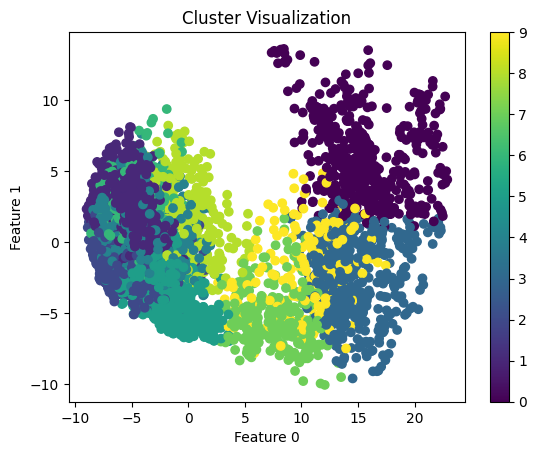

In [582]:
scatterPlot1 (X1_train_array, cluster_labels_all)

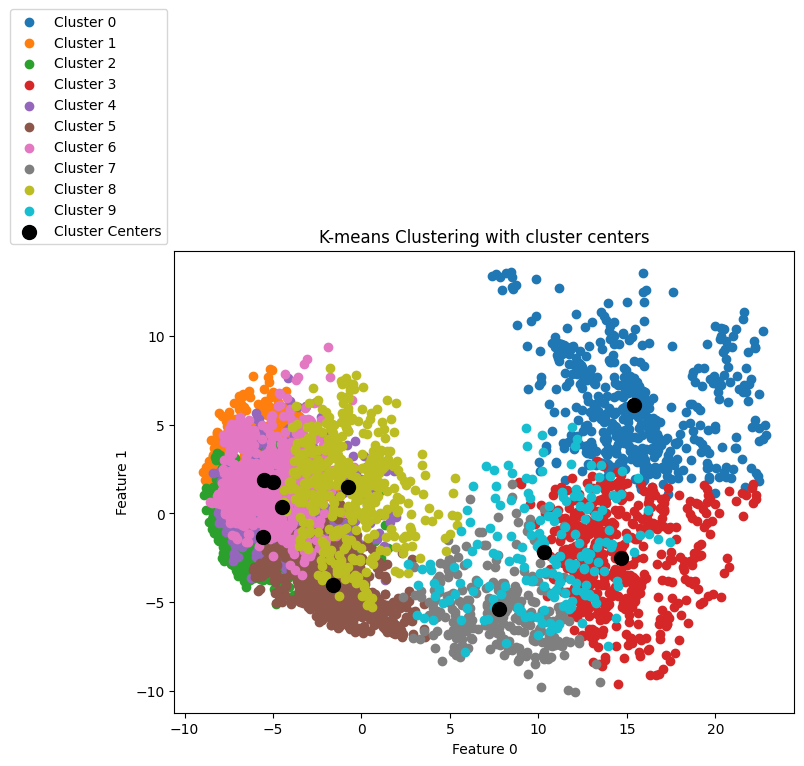

In [583]:
scatterPlot2(X1_train_array, cluster_labels_all, num_clusters, kmeans)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x600 with 0 Axes>

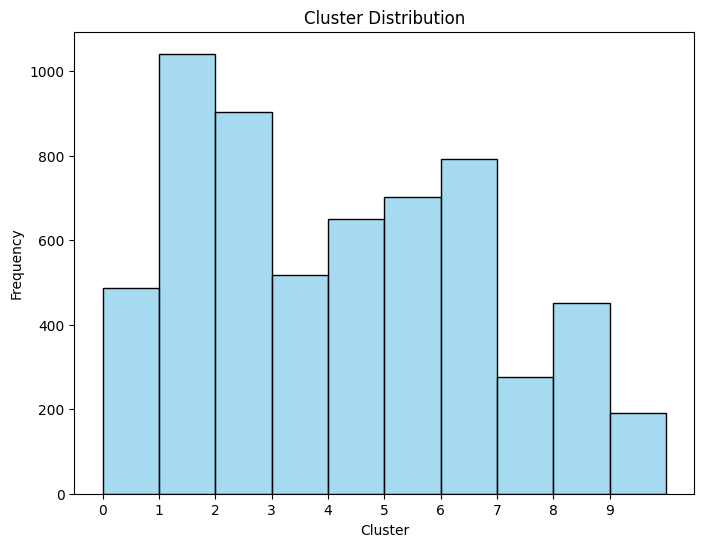

In [584]:
histogram_plot(num_clusters, X1_train_array, cluster_labels_all, cluster_centers_all)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



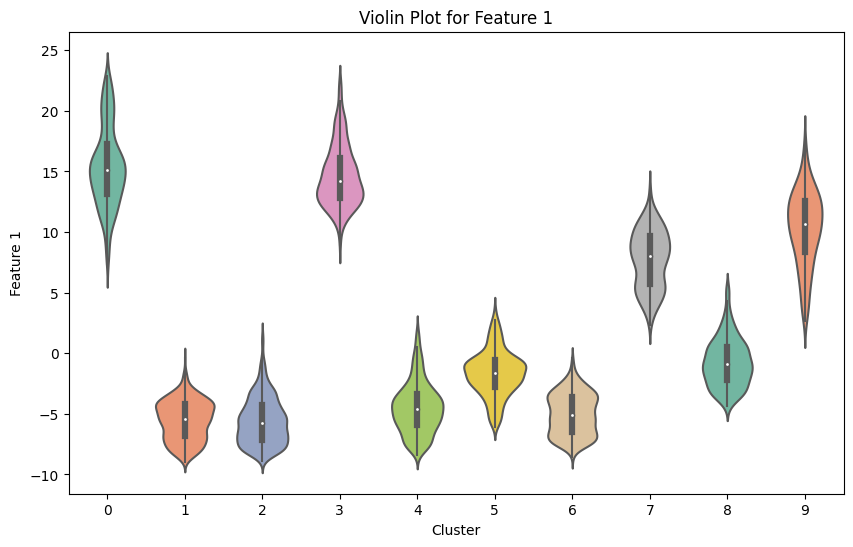

In [585]:
Violin_plot(X_copy, X1_train_array)

### Top 5

In [586]:
X5_train_array = X_pca
X5_copy = pd.DataFrame(X_pca)
kmeans_5.fit(X5_copy)
clusters_5 = kmeans_5.predict(X5_copy)
X5_copy["Cluster"] = clusters_5
cluster_labels_5 = kmeans_5.labels_
cluster_centers_5 = kmeans_5.cluster_centers_

In [587]:
PCAVisualization(X5_copy, num_clusters)

In [588]:
# TSNEVisualization(X5_copy, num_clusters, perplexity)

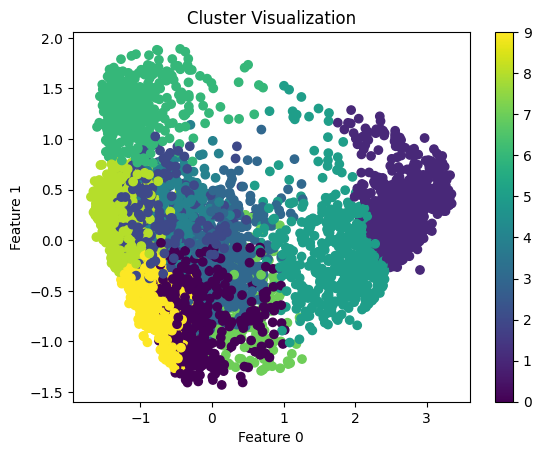

In [589]:
scatterPlot1 (X5_train_array, cluster_labels_5)

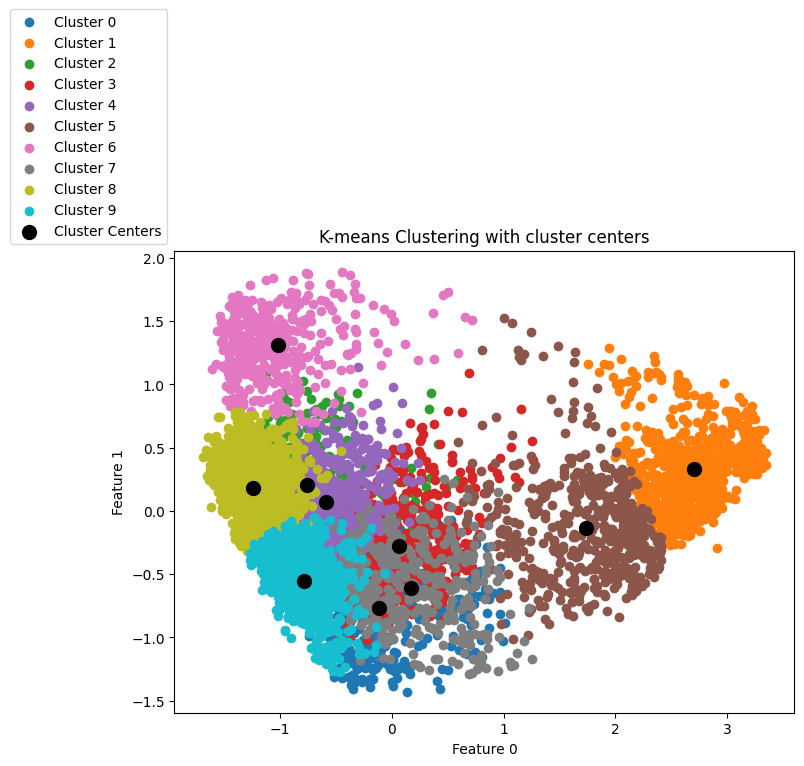

In [590]:
scatterPlot2(X5_train_array, cluster_labels_5, num_clusters, kmeans_5)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 800x600 with 0 Axes>

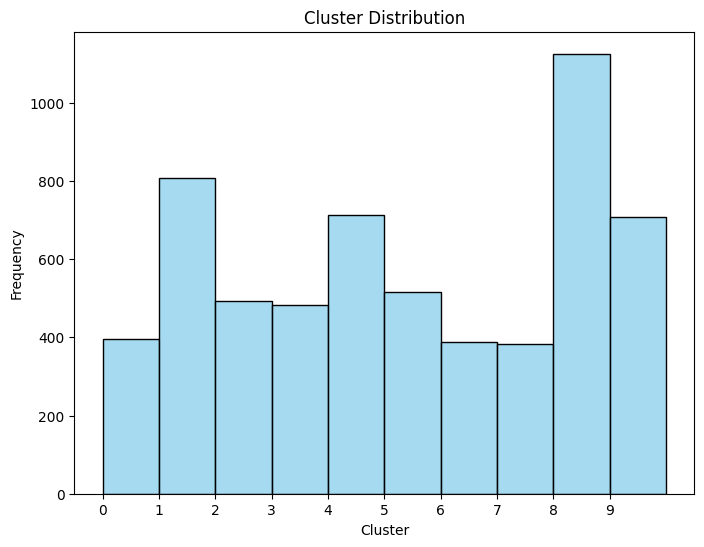

In [591]:
histogram_plot(num_clusters, X5_train_array, cluster_labels_5, cluster_centers_5)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



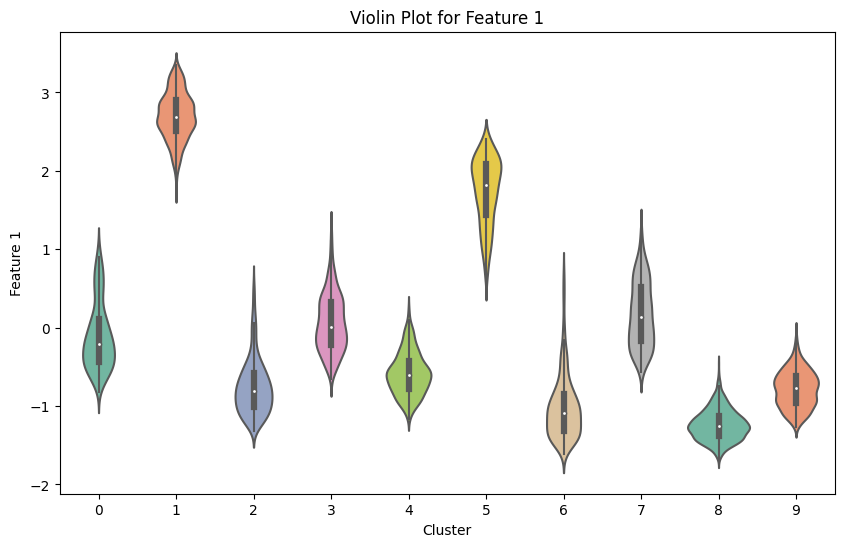

In [592]:
Violin_plot(X5_copy, X5_train_array)

# Evaluation

In [593]:
#Importing libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [595]:
def evaluatingModel(predicted_clusters, df, model, df_array):
    # # Perform K-Means clustering with a fixed number of clusters (for illustration purposes)
    # n_clusters = 10
    # kmeans_10 = KMeans(n_clusters=n_clusters,random_state=0, n_init=20)
    # kmeans_10.fit(X1_train_array)
    # clusters = kmeans_10.predict(normalized_df)

    # Evaluate clustering results (Silhouette Score and Davies-Bouldin Index)
    silhouette_avg = silhouette_score(df, predicted_clusters)
    db_index = davies_bouldin_score(df, predicted_clusters)
    ch_score = calinski_harabasz_score(df, predicted_clusters)



    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Calinski-Harabasz Index: {ch_score}")

    # # Visualize clusters (assuming normalized_df is 2D)
    # plt.scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 1], c=clusters, cmap='viridis')
    # plt.title('K-Means Clustering')
    # plt.show()

#     # Elbow Method for Optimal Number of Clusters
#     cluster_range = range(2, 10)  # Vary the number of clusters from 2 to 10, for example
#     inertia_values = []  # Store the inertia (WCSS) for each cluster count

#     # Calculate the within-cluster sum of squares (inertia) for different cluster counts
#     for n_clusters in cluster_range:
#         model = KMeans(n_clusters=n_clusters, n_init=50)
#         model.fit(df_array)
#         inertia_values.append(model.inertia_)

#     # Plot the inertia values to identify the elbow point
#     plt.figure(figsize=(10, 4))

#     plt.subplot(1, 2, 2)
#     plt.plot(cluster_range, inertia_values, marker='o')
#     plt.title("Elbow Method for Optimal Number of Clusters")
#     plt.xlabel("Number of clusters")
#     plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
#     plt.grid()

#     plt.tight_layout()
#     plt.show()

In [594]:
import pandas as pd
from sklearn.cluster import KMeans
 
num_clusters = 10
iterations = 50
 

# Calculate the most common class for each cluster
cluster_labels = []
for cluster_id in range(num_clusters):
    cluster_indices = cluster_labels_all == cluster_id
    cluster_y = train_y_df[cluster_indices]
    most_common_class = cluster_y.mode().values[0]
    cluster_labels.append(most_common_class)
    print(f"Cluster {cluster_id}: Most Common Class - {most_common_class}")
 
    # Calculate class distribution in the cluster
    class_distribution = cluster_y.value_counts()
    total_samples = len(cluster_y)
    print("Class Distribution in this cluster:")
    for cls, count in class_distribution.items():
        percentage = (count / total_samples) * 100
        print(f"Class {cls}: Count - {count}, Percentage - {percentage:.2f}%")
 
 
# Assign cluster labels to each cluster and create 'Assigned_Class' column
X_copy['Cluster'] = cluster_labels_all
X_copy['Assigned_Class'] = [cluster_labels[cluster_id] for cluster_id in cluster_labels_all]
 
# Calculate accuracy
correct_predictions = (X_copy['Assigned_Class'].values == train_y_df['0'].values).sum()
total_samples = len(train_y_df)
accuracy = correct_predictions / total_samples * 100
 
print(f"Accuracy: {accuracy:.2f}%")

Cluster 0: Most Common Class - [3]
Class Distribution in this cluster:
Class (3,): Count - 148, Percentage - 30.39%
Class (1,): Count - 133, Percentage - 27.31%
Class (2,): Count - 83, Percentage - 17.04%
Class (4,): Count - 70, Percentage - 14.37%
Class (0,): Count - 53, Percentage - 10.88%
Cluster 1: Most Common Class - [2]
Class Distribution in this cluster:
Class (2,): Count - 274, Percentage - 26.32%
Class (4,): Count - 228, Percentage - 21.90%
Class (1,): Count - 150, Percentage - 14.41%
Class (8,): Count - 90, Percentage - 8.65%
Class (3,): Count - 87, Percentage - 8.36%
Class (6,): Count - 73, Percentage - 7.01%
Class (5,): Count - 55, Percentage - 5.28%
Class (7,): Count - 55, Percentage - 5.28%
Class (9,): Count - 29, Percentage - 2.79%
Cluster 2: Most Common Class - [4]
Class Distribution in this cluster:
Class (4,): Count - 357, Percentage - 39.49%
Class (2,): Count - 264, Percentage - 29.20%
Class (1,): Count - 144, Percentage - 15.93%
Class (3,): Count - 136, Percentage -

In [596]:
import pandas as pd
from sklearn.cluster import KMeans
 
# Load your data
# X = pd.read_csv("x_train_all.csv", header=None)
# y = pd.read_csv("y_train_all.csv", header=None)
# train_y_df = pd.DataFrame(y)
# normalized_df = pd.DataFrame(X)
num_clusters = 10
iterations = 50
 
# Calculate the most common class for each cluster
cluster_labels = []
for cluster_id in range(num_clusters):
    cluster_indices = cluster_labels_5 == cluster_id
    cluster_y = train_y_df[cluster_indices]
    most_common_class = cluster_y.mode().values[0]
    cluster_labels.append(most_common_class)
    print(f"Cluster {cluster_id}: Most Common Class - {most_common_class}")
 
    # Calculate class distribution in the cluster
    class_distribution = cluster_y.value_counts()
    total_samples = len(cluster_y)
    print("Class Distribution in this cluster:")
    for cls, count in class_distribution.items():
        percentage = (count / total_samples) * 100
        print(f"Class {cls}: Count - {count}, Percentage - {percentage:.2f}%")
 
 
# Assign cluster labels to each cluster and create 'Assigned_Class' column
# X5_copy['Cluster'] = cluster_labels_5
X5_copy['Assigned_Class'] = [cluster_labels[cluster_id] for cluster_id in cluster_labels_5]
 
# Calculate accuracy
correct_predictions = (X5_copy['Assigned_Class'].values == train_y_df['0'].values).sum()
total_samples = len(train_y_df)
accuracy = correct_predictions / total_samples * 100
 
print(f"Accuracy: {accuracy:.2f}%")

Cluster 0: Most Common Class - [4]
Class Distribution in this cluster:
Class (4,): Count - 355, Percentage - 89.65%
Class (0,): Count - 26, Percentage - 6.57%
Class (3,): Count - 8, Percentage - 2.02%
Class (1,): Count - 7, Percentage - 1.77%
Cluster 1: Most Common Class - [3]
Class Distribution in this cluster:
Class (3,): Count - 373, Percentage - 46.28%
Class (2,): Count - 134, Percentage - 16.63%
Class (1,): Count - 95, Percentage - 11.79%
Class (6,): Count - 79, Percentage - 9.80%
Class (4,): Count - 78, Percentage - 9.68%
Class (0,): Count - 23, Percentage - 2.85%
Class (7,): Count - 11, Percentage - 1.36%
Class (8,): Count - 9, Percentage - 1.12%
Class (9,): Count - 4, Percentage - 0.50%
Cluster 2: Most Common Class - [2]
Class Distribution in this cluster:
Class (2,): Count - 174, Percentage - 35.29%
Class (4,): Count - 162, Percentage - 32.86%
Class (3,): Count - 77, Percentage - 15.62%
Class (1,): Count - 52, Percentage - 10.55%
Class (6,): Count - 16, Percentage - 3.25%
Clas

In [597]:
X5_copy.shape

(6010, 7)

### Complete train dataset

In [598]:
evaluatingModel(clusters_all, pd.DataFrame(X1_pca), kmeans, X1_train_array)

Silhouette Score: 0.22909363706118124
Davies-Bouldin Index: 1.3150670894845633
Calinski-Harabasz Index: 2783.5134508640444


### Top 5

In [599]:
evaluatingModel(clusters_5, pd.DataFrame(X_pca), kmeans_5, X5_train_array)

Silhouette Score: 0.2661010070753636
Davies-Bouldin Index: 1.2453206378783104
Calinski-Harabasz Index: 3628.9982274708727


# Pooja & Asmitha Part

## Hard Clustering Algorithm

### DBScan Algorithm

In [600]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=30) #Creating an instance of the algorith
dbscan_labels = dbscan.fit_predict(pca_df) #Fitting DBScan to the dataset
if len(set(dbscan_labels)) > 1: 
    silhouette_avg = silhouette_score(pca_df, dbscan_labels) #Calculating the silhouette score
    print("Silhouette Score Overall:", silhouette_avg) #Printing the silhouette score
    
else:
    print("Only one cluster was found, cannot calculate Silhouette Score.")

Silhouette Score Overall: 0.36825382670312895


### BIRCH Algorithm

In [602]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

birch = Birch(threshold=0.93, branching_factor=7) #Creating an instance of the algorithm 
birch_labels = birch.fit_predict(pca_df) #Fit the BIRCH model to the dataset
if len(set(birch_labels)) > 1:
    silhouette_avg = silhouette_score(pca_df, birch_labels) #Calculating the silhouette score
    print("Silhouette Score:", silhouette_avg)
else:
    print("Only one cluster was found, cannot calculate Silhouette Score.")

Silhouette Score: 0.40882995547109363


### Agglomerative Clustering Algorithm

In [601]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 10  #The number of clusters required
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters) #Creating an instance of the algorithm
agg_labels = agg_clustering.fit_predict(pca_df) #Fitting the agglomerative clustering to the dataset
silhouette_avg = silhouette_score(pca_df, agg_labels) # Calculating the Silhouette Score
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.21468179591832956


## Soft Clustering Algorithm

In [603]:
#pip install scikit-fuzzy
#!pip install MiniSom

In [607]:
# The line imports all the library required for the functions
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.metrics import silhouette_score

In [604]:
# The function creates a Gaussian Mixture Model for the given dataset.
# Takes in the number of clusters and the dataset to apply the GMM on.
def gmmModel(n,data): 
    gmm = GaussianMixture(n_components=n, covariance_type='full') # Creates an instance of the GM Model for the given n.
    gmm.fit(data) # Fits the model for the given dataset and estimates the parameter using EM.
    cls_asgn = gmm.predict(data) # Stores the cluster assignment for each point.
#     cls_means = gmm.means_
#     cls_covariances = gmm.covariances_
#     cls_weights = gmm.weights_
    silhouette_avg = silhouette_score(data, cls_asgn) # Calculates the silhouette score.
    print("The Number of Clusters : " + str(n)) # Prints the number of clusters.
    print(f"Silhouette Score: {silhouette_avg}") # Prints the Silhouette Score.

In [605]:
# The function creates a Fuzzy C Means Clustering  Model for the given dataset.
# Takes in the number of clusters and the dataset to apply the Fuzzy Clustering on.
def FuzzyClustering(n,data):
    fuzzy = 2.0  # Assigns the fuzziness parameter (i.e the level of overlap between clusters.)
    err = 0.001 # Assigns the error threshold.
    m_iter = 100  # Assigns the maximum number of iterations for the algorithm.
    initial_centers = np.random.rand(n, data.shape[1]) # Assigns the intial cluster centers.
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=data.T, c=n, m=fuzzy, error=err, maxiter=m_iter) # Performs Fuzzy C Means Clustering for the given parameters.
    cls_asgn = np.argmax(u, axis=0) # Stores the cluster assignment for each data point in the dataset.
    silhouette_avg = silhouette_score(data, cls_asgn) # Calculates the silhouette score.
    print("The Number of Clusters : " + str(n)) # Prints the number of clusters.
    print(f"Silhouette Score: {silhouette_avg}") # Prints the Silhouette Score.

In [606]:
# The function creates a Self organising Map Clustering for the given dataset.
# Takes the dataset to apply the SOM Clustering on.
def SOMModel(data):
    np.random.seed(42) # Sets the random seed.
    map_size = (10, 10)  # Assigns the size of the SOM grid.
    data = data.to_numpy()
    input_len = len(data[0]) # Takes the number of features in the dataset.
    learning_rate = 1 # Assigns the time it takes for SOM to adjust weights. 
    sigma = 2.0  # Assigns the neighbourhood radius.
    som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)# Creates a SOM instance for the given dataset.
    som.random_weights_init(data) # Intialses the random weights based on dataset.
    num_epochs = 100  # Assigns the number of epochs.
    som.train_random(data, num_epochs) # Trains the SOM for the given epochs.
    cls_asgn = np.array([som.winner(x) for x in data]) # Stores the cluster assignment for each data point in the dataset.
    cluster_labels = np.ravel(np.ravel_multi_index(cls_asgn.T, map_size))
    silhouette_avg = silhouette_score(data, cluster_labels) # Calculates the silhouette score.
    print(f"Silhouette Score: {silhouette_avg}") # Prints the Silhouette Score.


In [608]:
# # Before PCA with Outlier Removing
# # GMM Model
# L = [2,3,4,5,6,7,8,9,10,11,12]
# J = [12,25,50,100,120]
# print("Without PCA")
# for i in L:
#     data = X
#     print("GMM Clustering")
#     gmmModel(i,data)
#     print("Fuzzy Clustering")
#     FuzzyClustering(i,data)

data = pca_df
gmmModel(2,data)
FuzzyClustering(2,data)
SOMModel(data)


The Number of Clusters : 2
Silhouette Score: 0.5513196524934867
The Number of Clusters : 2
Silhouette Score: 0.5526454190198358
Silhouette Score: 0.02504378772238891


In [609]:
# L = [2,3,4,5,6,7,8,9,10,11,12]
# J = [12,25,50,100,120]
# print("With PCA")
# for i in J:
#     print("The PCA value is : "+str(i))
#     data = nPCA(i)
#     for i in L:
#         print("GMM Clustering")
#         gmmModel(i,data)
#         print("Fuzzy Clustering")
#         FuzzyClustering(i,data)